# Student math grades
Student Performance Data was obtained in a survey of students' math course in secondary school.
It consists of 33 Column
Dataset Contains Features like
gender, age, size of family, Father education, Mother education, Occupation of Father and Mother, Family Relation, Health, and Grades.

Grades  are evaluated in USA grading system
This dataset contains numerical values for corresponding grade.
Like, 19 means A++ and 0 means F-grade

For family status it is assumed that T means together and A means apart

Parent education is evaluated as follows:
Here 1 means no education
2 means elementary school education
3 means middle school education
4 means secondary school education
5 means higher that secondary school

Dalc and walc represents Weekly Alcohol Consumption and Daily Alcohol Consumption.

In [132]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the data and inspect
Import the data and have a look at it. We are trying to first see the following:
1. Is there missing data
    a. if yes, what should we do about it
2. Get an idea on how the data is structured

In [133]:
data = pd.read_csv('student_data.csv')

## Get a summary of the data
Use info function to see:
1. How many entries are there
2. What columns there are in the data set

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [135]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [136]:
pd.set_option('display.max_columns', None) # This line makes sure that juypter does not hide any columns
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## Checking how many null values there are

In [137]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## There are no null values. Therefore analysis can be started.

## Understanding what is a fail.
This dataset uses a grading system that I am not familiar with. We will do a quick analysis on the failures to determine what is considered a fail.

In [138]:
failures = data[data['failures']>0]
failures[['failures','G1','G2','G3']].head(15)

,failures,G1,G2,G3
2,3,7,8,10
18,3,6,5,5
25,2,6,9,8
40,1,7,10,11
44,1,10,10,9
49,1,7,7,7
52,1,11,11,10
72,2,8,6,5
78,3,8,8,10
85,2,7,9,8


## Inconsitent what is a fail. We will use 9 as that seems to be the average

## Creating average grade column
Creating an average grade column so that it can be analysed easier

In [139]:
data['g_mean'] = (data['G1'] + data['G2'] + data['G3']) / 3

### Checking to see that the average grade was calculated correctly

In [140]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,g_mean
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,8.666667


## Getting an idea of the distribution of the grades for this school

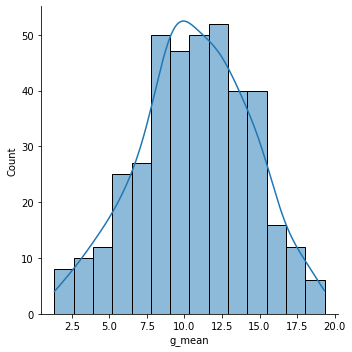

In [141]:
sns.displot(data=data,x='g_mean',kde=True)
plt.show()

## The school appears to have relatively evenly distributed grades 
It does not look like this school have any strange distributions with the grades of the students

## Starting with a heatmap to get an idea of how the data correlates
For this analysis we will frop the G1, G2 and G3 grades as these are averaged in g_mean

<AxesSubplot:>

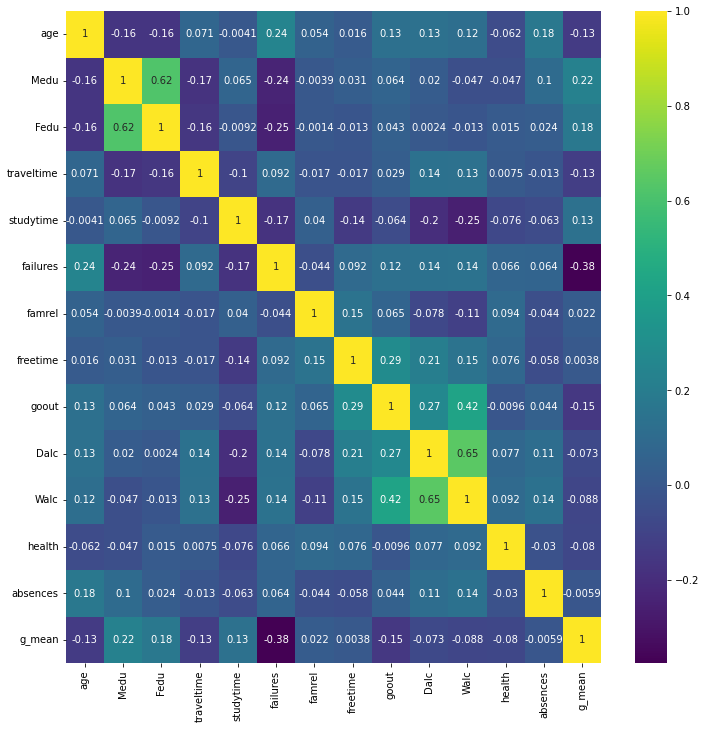

In [142]:
fig = plt.figure(figsize=[12,12])
sns.heatmap(data.drop(['G1', 'G2', 'G3'], axis=1).corr(),cmap='viridis',annot=True)

## Analysis of heat map

The heat map contains a lot of information so it is actually a bit difficult to read. Nothing useful can really be gathered. It does look like there is a relation between the following on the grades:
1. Father and mother education
2. Age
3. Study time and travel time (these could be related so we will analyse this together)
4. Gout 

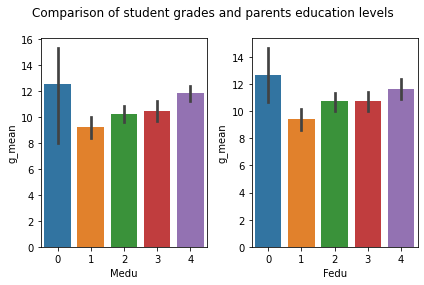

In [143]:
fig,axes = plt.subplots(nrows=1,ncols=2)
fig.suptitle('Comparison of student grades and parents education levels')

sns.barplot(x='Medu', y='g_mean',data=data, ax=axes[0])
sns.barplot(x='Fedu', y='g_mean',data=data, ax=axes[1])

fig.tight_layout() #to fix any overlapping

plt.show()

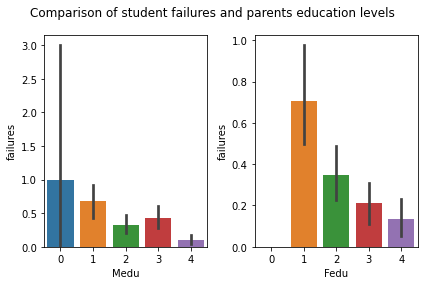

In [144]:
fig,axes = plt.subplots(nrows=1,ncols=2)
fig.suptitle('Comparison of student failures and parents education levels')

sns.barplot(x='Medu', y='failures',data=data, ax=axes[0])
sns.barplot(x='Fedu', y='failures',data=data, ax=axes[1])

fig.tight_layout() #to fix any overlapping

plt.show()

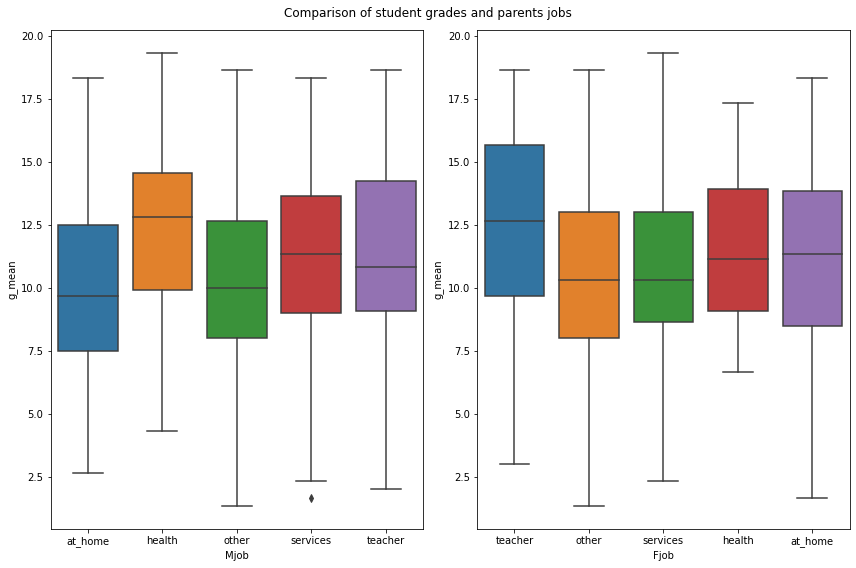

In [145]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,8))
fig.suptitle('Comparison of student grades and parents jobs')

sns.boxplot(x='Mjob', y='g_mean',data=data, ax=axes[0])
sns.boxplot(x='Fjob', y='g_mean',data=data, ax=axes[1])

fig.tight_layout() #to fix any overlapping

plt.show()

## Parents education shows a trend
It can be seen that the education of the parents do have an effect on the grades of the student. The higher the parents' level of education the more likely the student is to have a higher grade. It must be noted though that just because the parents have high educations it does not neccessarly mean that the student will have a high grade. We can see that the students with parents that don't have high educations can still do well, they are jsut more likley to do better if the parents have a better education.

It can also be noted that the job of the parents however do play a role in the grades of the students. Parents that are health workers or teachers tend to have kids that will do better in school. This is mos likely due to the parents being able to guide their children on how to study and it can be assumed that these parents also taking the grades of their children more seriously. This most likely leads to the parents helping their children more during their studies.

## Effect of age on grades

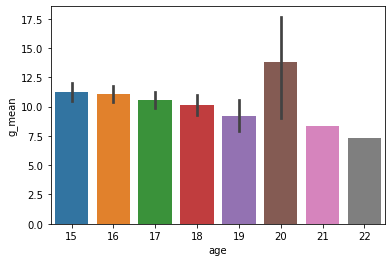

In [146]:
sns.barplot(x='age', y='g_mean',data=data)
plt.show()

## Slight trend
There appears to be a slight trend where the older the student hte worse the grades. This is a small trend however with one outlier of students in their 20s.

## The effect of travel time and free time on student grades

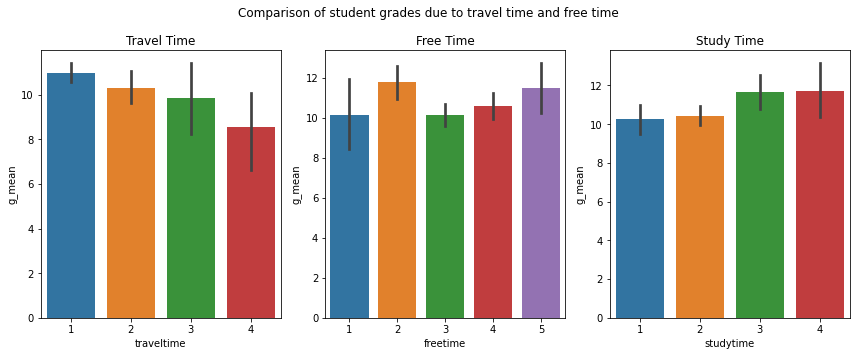

In [147]:
fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(12,5))
fig.suptitle('Comparison of student grades due to travel time and free time')

sns.barplot(x='traveltime', y='g_mean',data=data, ax=axes[0])
axes[0].set_title('Travel Time')
sns.barplot(x='freetime', y='g_mean',data=data, ax=axes[1])
axes[1].set_title('Free Time')
sns.barplot(x='studytime', y='g_mean',data=data, ax=axes[2])
axes[2].set_title('Study Time')

fig.tight_layout() #to fix any overlapping

plt.show()

## Longer travel time could lead to lower grades whereas more study time could result in higher grades. 
From the above there does not seem to be a trend relating to free time of the student.

## Lastly we will look at the effects of the students going out on their grades

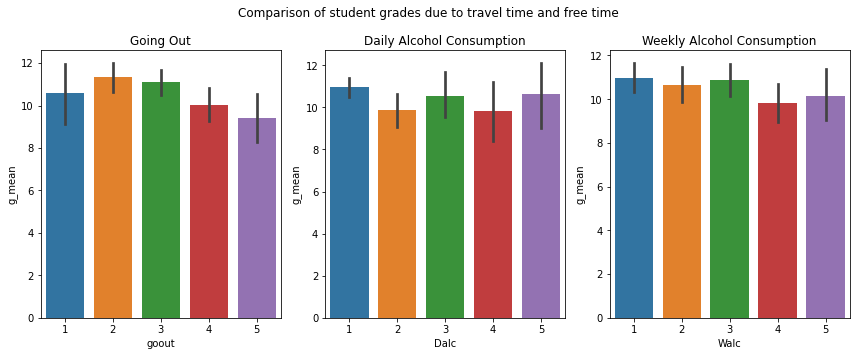

In [148]:
fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(12,5))
fig.suptitle('Comparison of student grades due to travel time and free time')

sns.barplot(x='goout', y='g_mean',data=data, ax=axes[0])
axes[0].set_title('Going Out')
sns.barplot(x='Dalc', y='g_mean',data=data, ax=axes[1])
axes[1].set_title('Daily Alcohol Consumption')
sns.barplot(x='Walc', y='g_mean',data=data, ax=axes[2])
axes[2].set_title('Weekly Alcohol Consumption')

fig.tight_layout() #to fix any overlapping

plt.show()

## Going out leads to worse grades
The chart above shows that students that tend to go out more tend to have lower grades. This can be attributed to the fact that these students could be spending less time studying comparted to those that aren't going out. How regularly the students consumed alcohol does not appear to have a real effect on the student grades.

# Other factors not shown in heat map
There are other factors that aren't represented numerically that aren't shown in the heatmap that could also play a roll on the grades of the student. We will next have a look at these factors to see how they effect the student grades.

The factors we will look at are:
1. Family size
2. Student health
3. Student's romantic status
4. Student activities

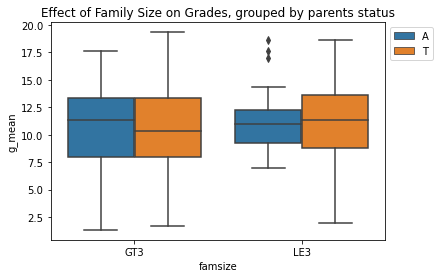

In [149]:
sns.boxplot(x='famsize', y='g_mean', data=data, hue='Pstatus').set(title='Effect of Family Size on Grades, grouped by parents status')

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

## No real relationship seen between family size and student grades

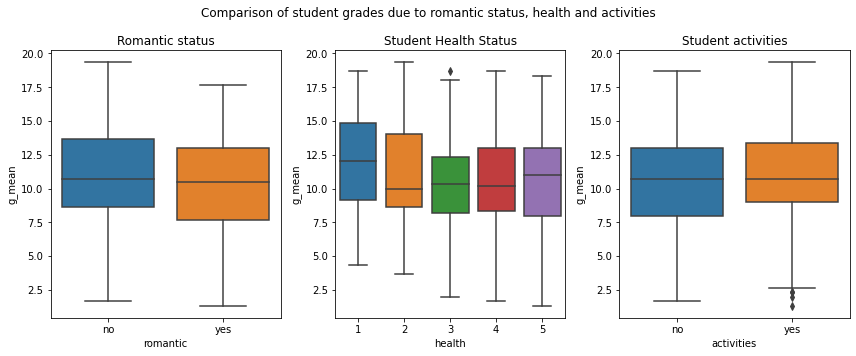

In [150]:
fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(12,5))
fig.suptitle('Comparison of student grades due to romantic status, health and activities')

sns.boxplot(x='romantic', y='g_mean',data=data, ax=axes[0])
axes[0].set_title('Romantic status')
sns.boxplot(x='health', y='g_mean',data=data, ax=axes[1])
axes[1].set_title('Student Health Status')
sns.boxplot(x='activities', y='g_mean',data=data, ax=axes[2])
axes[2].set_title('Student activities')

fig.tight_layout() #to fix any overlapping

plt.show()

## Again there is not a large difference between groups
It can be seen that although there are very minor differences the student grades are relatively independent from their romatic status and activity status. There is an effect on the grades if the student is healthy or not but again this is a small effect and once the student shows any sickness whether it be insiginicant or not the student's grade are likely to be a bit lower.

# Conclusion

In conclusion the major factors that effect the grades of the students are their parents education status and job, whether the student has any health issues, the amount of time that a student spends traveling and then finally the age of the student. 

The biggest difference was seen in the education of the parents. This was most evident in the number of failures a student has. There was not a large difference in their average grade however.

A student that is therefore more likely to do well has parents with better education that works in a field that required them to study or know how to teach as these are professions that take knowledge and studying seriously. Reducing the student's travel time as much as possible and ensuring they are in good health will also help to make sure that the student has good grades.